# Fitting statistical distributions to univariate data

There isn't always a clear or consensus way of fitting a KDE to some data particularly in histogram form for continuous and discrete distribution types.

We attempt to solve this with the combination of `turb.stats.univariate_kde` and `turb.plot.histogram`.

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../../turbopanda/")
import turbopanda as turb

%matplotlib inline

## Parameters of the histogram:

Firstly let's try to plot a basic normal distribution. By default it *automatically* tries to fit the best distribution to it.

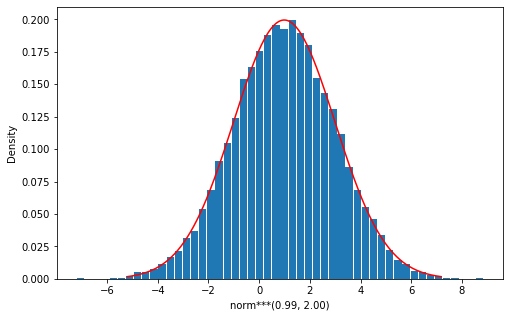

In [2]:
x = stats.norm.rvs(loc=1, scale=2., size=20000)
_=turb.plot.histogram(x)

Within `histogram` we can choose to specify *custom* bins if we want, but the default selections are usually pretty good.

The `kde` parameter determines if we calculate the KDE or not, which is optional.

By default, a automatic kde distribution is imputed:

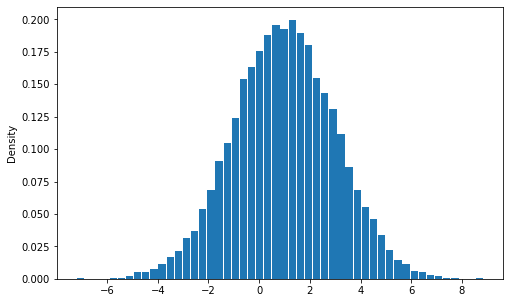

In [3]:
_=turb.plot.histogram(x, kde=None)

Statistical information regarding the histogram can be displayed using the `stat` keyword:

This gives the mean, standard deviation, skew and kurtosis parameters.

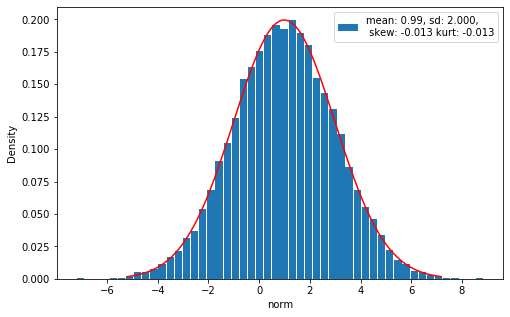

In [4]:
turb.plot.histogram(x, kde='norm', stat=True)
plt.show()

Additionally, if you work with `pandas.Series` and the series has a name, the name is automatically extracted or you can define it yourself:

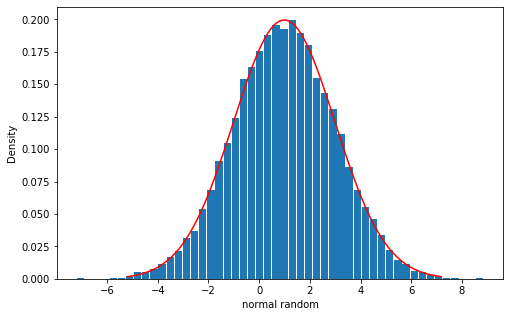

In [5]:
turb.plot.histogram(x, x_label='normal random')
plt.show()

## One step deeper, `univariate_kde`

The actual KDE is calculated from another function which you can access:

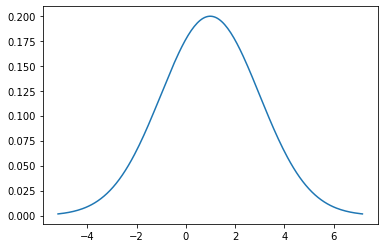

In [6]:
xkd, ykd = turb.stats.univariate_kde(x, kde_name='norm')
_ = plt.plot(xkd, ykd)

## Testing different distributions

Here we will test a number of continuous and discrete distributions:

### T-distribution

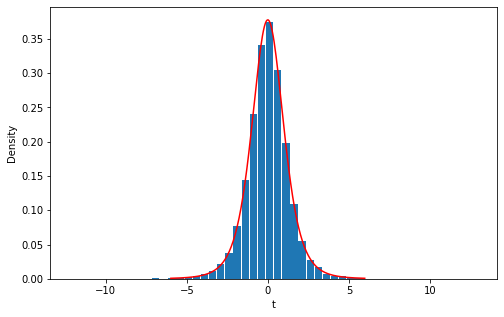

In [7]:
x = stats.t.rvs(df=5, size=20000)
_=turb.plot.histogram(x, kde='t')

### Exponential distribution

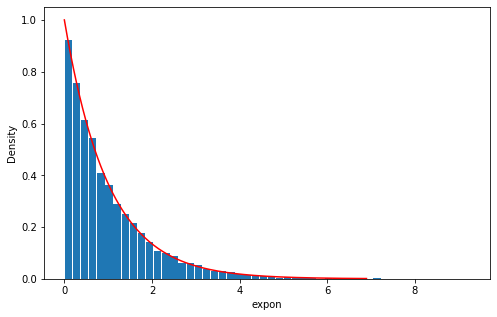

In [8]:
x = stats.expon.rvs(size=20000)
_=turb.plot.histogram(x, kde='expon')

## $\chi^2$-distribution

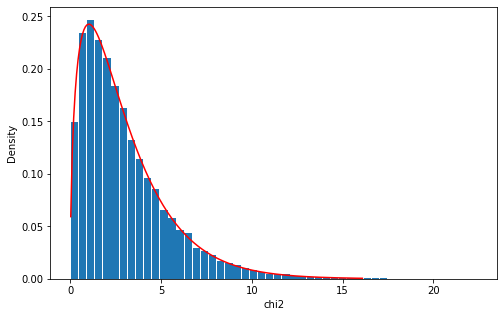

In [9]:
x = stats.chi2.rvs(df=3, size=20000)
_=turb.plot.histogram(x, kde='chi2')

## Discrete distributions

Due to the lack of support from Scipy in fitting the parameters easily for discrete distributions, we have limited support, but we support the most important distributions:

### Bernoulli distribution

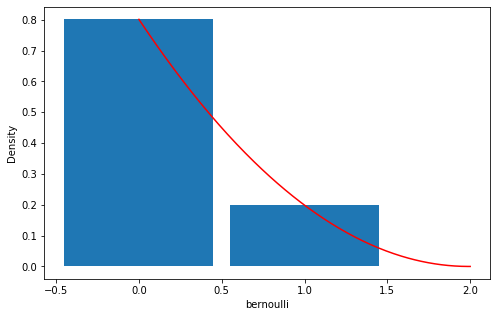

In [10]:
x = stats.bernoulli.rvs(p=.2, size=20000)
_=turb.plot.histogram(x, kde='bernoulli')

### Binomial distribution

initial guess: [11.680875, 0.3088235294117647, 0], minimized guess: (11.0, 0.3201231829229509, -0.0)


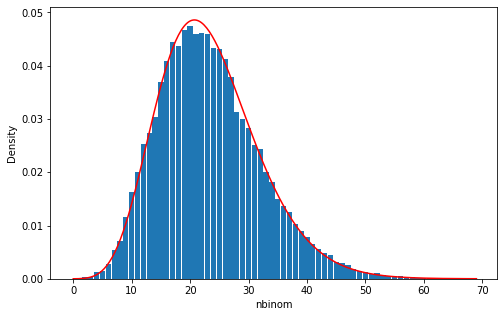

In [11]:
x = stats.nbinom.rvs(n=10, p=.3, size=20000)
_=turb.plot.histogram(x, kde='nbinom', verbose=1)

### Poisson distribution

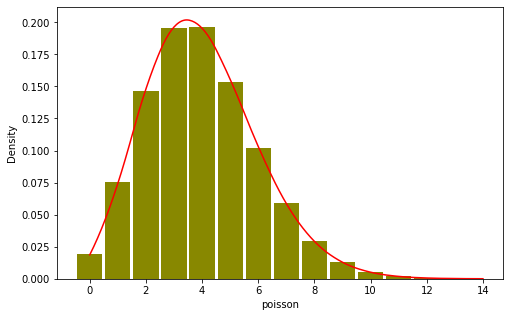

In [12]:
x = stats.poisson.rvs(mu=4, size=20000)
_=turb.plot.histogram(x, kde='poisson', facecolor='#888800')

## Automatic selection of a distribution:

Not bad, given the relationships between *gamma* and *binomial*. by default, only continuous distributions with a `fit` method are chosen for auto-analysis.

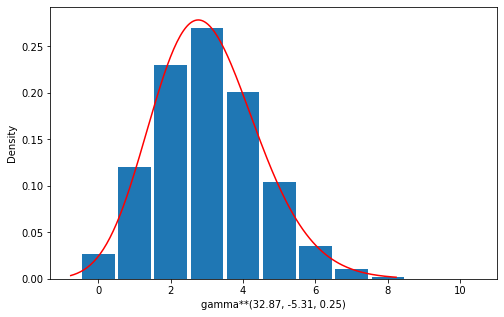

In [13]:
x = stats.binom.rvs(n=10, p=.3, size=20000)
_=turb.plot.histogram(x,verbose=1)

An almost perfect fit.

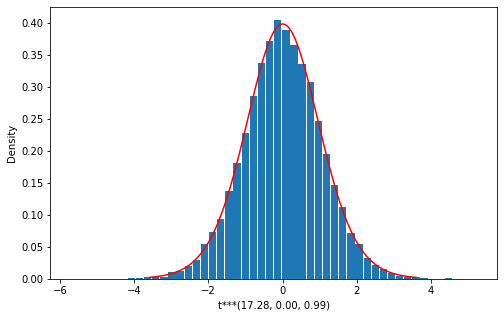

In [14]:
x = stats.t.rvs(df=20, size=20000)
_=turb.plot.histogram(x,verbose=1)

## A bimodal distribution example

How does the fitting handle a *bimodal distribution*?

In [15]:
import numpy as np

In [16]:
x = np.hstack((stats.norm.rvs(loc=0, scale=1.5, size=10000), stats.norm.rvs(loc=4, scale=1.2, size=10000)))

..not very well it would seem.

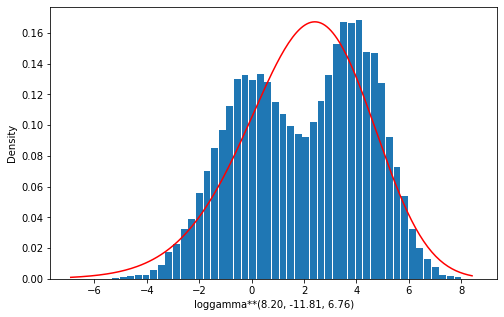

In [17]:
_=turb.plot.histogram(x,verbose=1)

### Using freeform

We use the `freeform` option for the `kde` argument.

This simply fits a KDE directly to the points, but we don't properly get to infer which distribution it belongs to. Suchs problems definitely lie outside the scope of this tool.

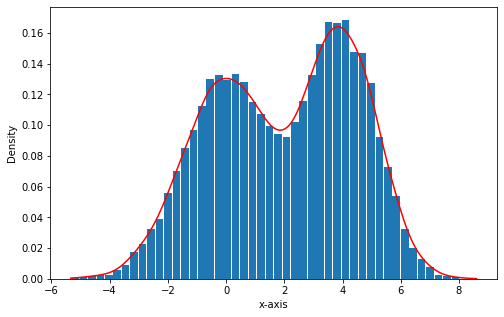

In [18]:
_=turb.plot.histogram(x,kde='freeform',verbose=1)